In [86]:
import pandas as pd
import pylab as plt
# import jtplot submodule from jupyterthemes
#from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
#jtplot.style()

animal_pred='../../paper_data_v2//irat_enet/results/animal_predictions/combined_results.csv'

In [87]:
af=pd.read_csv(animal_pred,index_col=0)

In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression
qrisk=np.array([1/(np.array(eval(x)).mean()) for x in af.ha_risk.values]).reshape(-1, 1)
reg = LinearRegression().fit(qrisk, af.emergence_risk.values)
erisk=reg.predict(qrisk)
af['erisk']=erisk

In [89]:
#import numpy as np
#qrisk=np.array([1/(np.array(eval(x)).mean()) for x in af.ha_risk.values])

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [smoothline] >Smoothing by interpolation..
[distfit] >INFO> [expon] [0.00 sec] [RSS: 2.21636] [loc=4.186 scale=0.634]


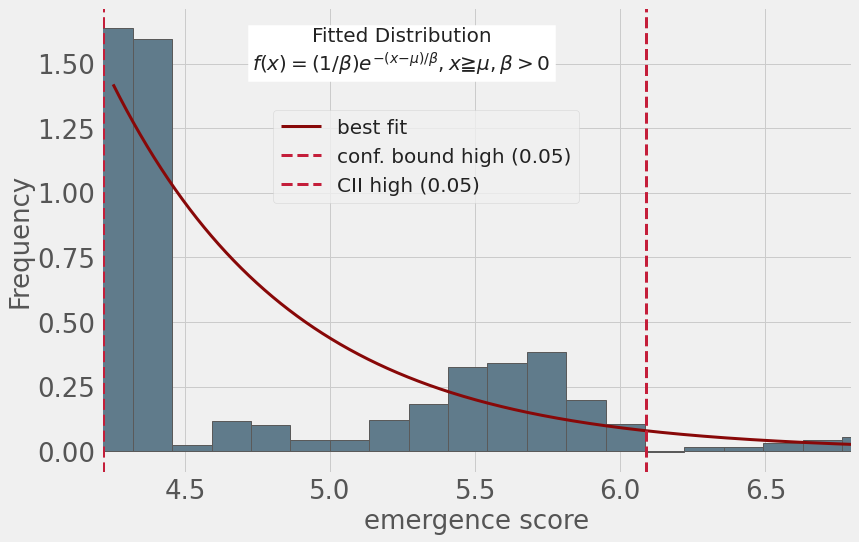

In [105]:
plt.style.use('fivethirtyeight')
from distfit import distfit
dfit = distfit(alpha=0.05,n_boots=5,smooth=3,distr=['expon'])
dfit.fit_transform(erisk)
#fig,ax=dfit.plot(emp_properties=None,fontsize=26,figsize=(12,8),xlim=[0,155])
fig,ax=dfit.plot(emp_properties=None,fontsize=26,figsize=(12,8),xlim=[4.21,6.8])
h, l = ax.get_legend_handles_labels()
l[0]='best fit'
l[1]='conf. bound high (0.05)'
l=plt.legend(l, fontsize="20", loc ="upper right",bbox_to_anchor=(0.65,0.8))
for text in l.get_texts():
    text.set_color("k")
ax.set_title('Fitted Distribution\n'+r"$f(x)=(1/\beta)e^{−(x−\mu)/\beta}, x\geqq \mu, \beta > 0 $",
             fontsize=20,y=.85,x=.4,color='k',backgroundcolor='white')
ax.set_xlabel('emergence score')
#ax.set_xticklabels(1/(.001+ax.get_xticks()))
#dfit.predict([125])
plt.savefig('../../tex/overleaf/Figures/nullmodel.pdf',dpi=600,bbox_inches='tight',transparent=True)

In [102]:
af[af.erisk>6.4]#.index.size

,subtype,ha_accession,na_accession,ha,na,ha_risk,na_risk,geometric_mean_risk,emergence_risk,emergence_risk_var,impact_risk,impact_risk_var,qrisk,erisk
id,,,,,,,,,,,,,,
A/swine/Iowa/A02479425/2020,H1N1,EPI1766616,EPI1766617,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGMANLILQIGNIISIWISHSIQIENQSQI...,"[0.006129483668569216, 0.005969164156431298, 0...","[0.005983887094889003, 0.006195873645176689, 0...","[0.006056247866681502, 0.00608146256097709, 0....",6.733219,0.000037,6.723979,0.000029,176.502566,8.970111
A/swine/Indiana/A02524436/2020,H1N1,EPI1766712,EPI1766713,MKAILVVMLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGTANLILQIGNIISIWVSHSIQIGNQSQI...,"[0.007846888220190447, 0.008085867931513422, 0...","[0.0016000691389129699, 0.0019043683598783635,...","[0.0035433830836682696, 0.0039240885630843336,...",6.781506,0.000006,6.766599,0.000005,127.165696,7.619655
A/swine/Indiana/A02524438/2020,H1N1,EPI1766716,EPI1766717,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVSHSIQIGNQSQI...,"[0.008012716927321773, 0.007987227206630103, 0...","[0.005925352733541322, 0.006139020007445851, 0...","[0.006890440780414479, 0.007002410129770894, 0...",6.713931,0.000025,6.706966,0.000019,132.156304,7.756258
A/swine/Iowa/A02479310/2020,H1N1,EPI1768609,EPI1768610,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGMANLILQIGNIISIWISHSIQIENQSQT...,"[0.006129030385884646, 0.005968710859061285, 0...","[0.006199280048206975, 0.006407246208382197, 0...","[0.0061640551413877686, 0.006184092497743712, ...",6.730994,0.000039,6.722016,0.000030,176.516866,8.970502
A/swine/Missouri/A02479312/2020,H1N1,EPI1768635,EPI1768636,MKAILVVLLYTFTTANADTLCIGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSICMTIGMANLILQIGNIISIWVSHSIQIGNQSQI...,"[0.009577816841499042, 0.009363162965632105, 0...","[0.00954190265307195, 0.009804829457987736, 0....","[0.00955984288210517, 0.009581451667955617, 0....",6.655678,0.000019,6.655623,0.000015,108.947605,7.120986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A/swine/Oklahoma/A02711859/2022,H3N2,EPI2176697,EPI2176698,MKTIIALSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILLTTVTLHFRQHDCNSSP...,"[0.010601558530664154, 0.006726609833350569, 0...","[0.0246665466284569, 0.02479319787506599, 0.02...","[0.016171080292637915, 0.012914107349198602, 0...",6.563061,0.001364,6.574135,0.001052,128.696942,7.661568
A/swine/Iowa/A02710700/2022,H3N2,EPI2176713,EPI2176714,MKTIIVLSQILYLVLAQKLPGNDNNMATLCLGHHAVPNGTIVKTIT...,MNPNKKIITIGSVSLALATICFLMQIAILVTTVTLHFKQHNSDSSP...,"[0.012128291252664814, 0.008194246097936828, 0...","[0.024244653080605957, 0.02441610759959349, 0....","[0.017147775770676683, 0.014144666642405351, 0...",6.538037,0.001162,6.552142,0.000896,107.793701,7.089402
A/swine/Iowa/A02750768/2022,H3N2,EPI2188365,EPI2188366,MKTIIVLSQILYLVLAQKLPGNDNNMATLCLGHHAVPNGTIVKTIT...,MNPNKKIITIGSVSLALATICFLMQIAILVTTVTLHFKQHDCDSSP...,"[0.013504523640720483, 0.009597207365475233, 0...","[0.025022866283564864, 0.025194319962706362, 0...","[0.01838265185670961, 0.015549762477743034, 0....",6.509372,0.001049,6.526963,0.000808,93.664028,6.702642


<AxesSubplot:>

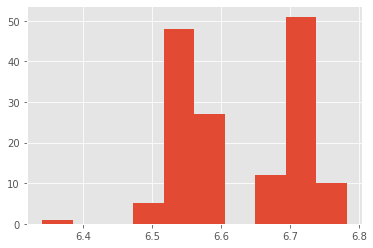

In [17]:
af[af.qrisk>125].emergence_risk.hist()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [smoothline] >Smoothing by interpolation..
[distfit] >INFO> [norm] [0.04 sec] [RSS: 4.31591] [loc=6.632 scale=0.093]       
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Norm(loc:6.631670, scale:0.092964)


(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'\nnorm(loc=6.63167, scale=0.0929644)'}, xlabel='Values', ylabel='Frequency'>)

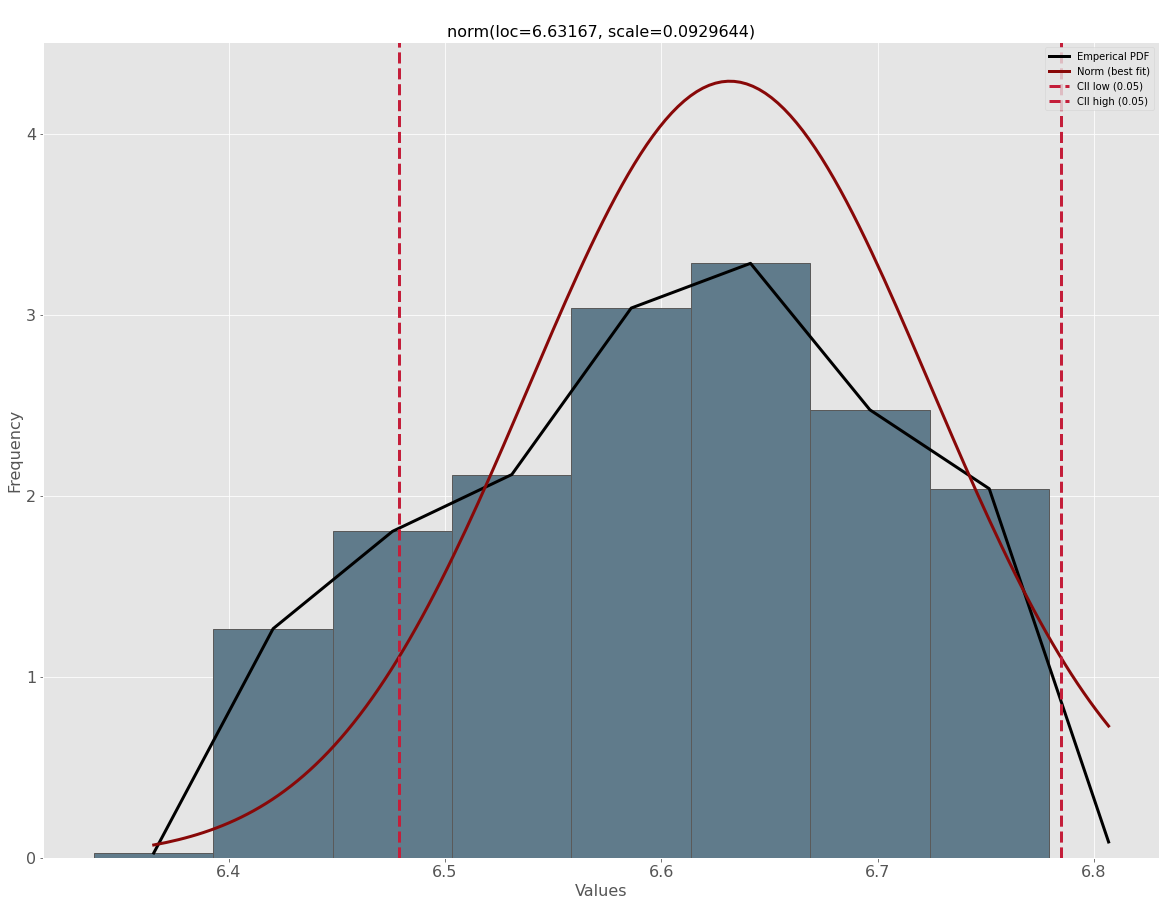

In [20]:
dat=af[af.qrisk>125].emergence_risk.values
from distfit import distfit
dfit = distfit(distr='norm',n_boots=10,smooth=5)
dfit.fit_transform(dat)
dfit.plot()
#dfit.predict([6.6])